In [135]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.5 MB/s eta 0:00:00a 0:00:01


In [1]:
# importing required libraries

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('./MLZilla Data Set.xlsx')
df.head()
# df _ raw

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerLifetimeValue,CustomerSatisfactionScore,NetPromoterScore,AverageCallDuration,NumberOfComplaints,PreferredContactMethod,LastInteractionDate,PromotionalOffersUsed,BillingCycle,NumberOfDependents
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,4370.861070,2.0,84.0,17.526822,2.0,SMS,00:44:18.200000,1.0,26.0,1.0
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,9556.428758,9.0,0.0,10.601054,3.0,Phone,00:44:18.200000,3.0,3.0,1.0
2,3668-QPYBK,Male,0.0,No,No,NaN,Yes,NaN,DSL,Yes,Yes,No,No,No,No,NaN,Yes,Mailed check,NaN,108.15,Yes,7587.945476,3.0,31.0,45.091316,NaN,SMS,00:44:18.200000,1.0,19.0,3.0
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,6387.926358,4.0,29.0,14.931076,4.0,Email,00:44:18.200000,0.0,16.0,3.0
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2404.167764,1.0,-89.0,8.830655,2.0,SMS,00:44:18.200000,0.0,1.0,3.0


In [3]:
print(df.shape, df.columns)

(7205, 31) Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'CustomerLifetimeValue', 'CustomerSatisfactionScore',
       'NetPromoterScore', 'AverageCallDuration', 'NumberOfComplaints',
       'PreferredContactMethod', 'LastInteractionDate',
       'PromotionalOffersUsed', 'BillingCycle', 'NumberOfDependents'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 6886 non-null   object 
 1   gender                     6897 non-null   object 
 2   SeniorCitizen              6877 non-null   float64
 3   Partner                    6906 non-null   object 
 4   Dependents                 6921 non-null   object 
 5   tenure                     6560 non-null   float64
 6   PhoneService               6888 non-null   object 
 7   MultipleLines              6882 non-null   object 
 8   InternetService            6247 non-null   object 
 9   OnlineSecurity             6892 non-null   object 
 10  OnlineBackup               6894 non-null   object 
 11  DeviceProtection           6883 non-null   object 
 12  TechSupport                6900 non-null   object 
 13  StreamingTV                6904 non-null   objec

In [5]:
missing_values = (df.isna().sum() / len(df)) * 100
print(missing_values)

customerID                    4.427481
gender                        4.274809
SeniorCitizen                 4.552394
Partner                       4.149896
Dependents                    3.941707
tenure                        8.952117
PhoneService                  4.399722
MultipleLines                 4.482998
InternetService              13.296322
OnlineSecurity                4.344205
OnlineBackup                  4.316447
DeviceProtection              4.469119
TechSupport                   4.233171
StreamingTV                   4.177654
StreamingMovies               4.247051
Contract                      4.260930
PaperlessBilling              4.302568
PaymentMethod                 4.136017
MonthlyCharges                9.104788
TotalCharges                  8.841083
Churn                         3.858432
CustomerLifetimeValue         4.302568
CustomerSatisfactionScore    17.349063
NetPromoterScore              4.080500
AverageCallDuration           3.927828
NumberOfComplaints       

In [10]:
## 4.1 Imputing Columns with < 5% Missing Values
# Numerical Columns
numerical_cols = ['SeniorCitizen', 'MonthlyCharges', 'BillingCycle', 'NumberOfDependents']
for col in numerical_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())


In [43]:
df.replace("", np.nan, inplace=True)  # Convert empty strings to NaN

In [44]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                     'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in categorical_cols:
    if df[col].isna().sum() > 0:
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col] = df[col].fillna(mode_value.iloc[0])  # Use `.iloc[0]`

In [45]:
## 4.2 Handling Columns with 5% - 15% Missing Values
# Impute if important, drop if not critical
important_cols = ['InternetService']
less_important_cols = ['PromotionalOffersUsed']

In [46]:
df['InternetService'] = df['InternetService'].fillna(df['InternetService'].mode()[0])

In [49]:
if 'PromotionalOffersUsed' in df.columns:
    df.drop('PromotionalOffersUsed', axis=1, inplace=True)

In [50]:
if 'CustomerSatisfactionScore' in df.columns:
    df.drop(['CustomerSatisfactionScore'], axis=1, inplace=True)
else:
    print("Column not found!")

Column not found!


In [51]:
df = df[df['Churn'].notna()]

In [52]:
df = df[df['customerID'].notna()]

In [53]:
df['tenure'] = df['tenure'].fillna(df['tenure'].median())

In [54]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [55]:
df['CustomerLifetimeValue'] = df['CustomerLifetimeValue'].fillna(df['CustomerLifetimeValue'].mean())

In [56]:
df['NetPromoterScore']= df['NetPromoterScore'].fillna(df['NetPromoterScore'].median())

In [59]:
if not df['LastInteractionDate'].dropna().empty:
    mode_value = df['LastInteractionDate'].mode()
    if not mode_value.empty:
        df['LastInteractionDate'] = df['LastInteractionDate'].fillna(mode_value.iloc[0])

In [64]:
print("\nFinal Missing Values Check:")
print((df.isna().sum() / len(df)) * 100)


Final Missing Values Check:
customerID                  0.000000
gender                      0.000000
SeniorCitizen               0.000000
Partner                     0.000000
Dependents                  0.000000
tenure                      0.000000
PhoneService                0.000000
MultipleLines               0.000000
InternetService             0.000000
OnlineSecurity              0.000000
OnlineBackup                0.000000
DeviceProtection            0.000000
TechSupport                 0.000000
StreamingTV                 0.000000
StreamingMovies             0.000000
Contract                    0.000000
PaperlessBilling            0.000000
PaymentMethod               0.000000
MonthlyCharges              0.000000
TotalCharges                0.000000
Churn                       0.000000
CustomerLifetimeValue       0.000000
NetPromoterScore            0.000000
AverageCallDuration         1.235294
NumberOfComplaints          1.632353
PreferredContactMethod      1.588235
LastInter

In [65]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
6873  1728-BQDMA  Female            0.0      No         No     2.0   
6874  1803-BGNBD  Female            0.0      No         No    12.0   
6875  4160-AMJTL  Female            1.0      No         No    29.0   
6876  5192-EBGOV  Female            1.0      No         No     1.0   
6878  8402-EIVQS    Male            0.0     Yes         No    67.0   
...          ...     ...            ...     ...        ...     ...   
7199  3308-DGHKL    Male            0.0      No         No    69.0   
7201  6195-MELTI    Male            0.0      No         No    57.0   
7202  8945-MUQUF    Male            0.0      No         No    51.0   
7203  5921-NGYRH    Male            0.0     Yes         No    64.0   
7204  9398-MMQTO    Male            0.0      No         No     3.0   

     PhoneService MultipleLines InternetService       OnlineSecurity  \
6873          Yes            No             DSL                   No   

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
print("Duplicates After Removal:", df.duplicated().sum())

Duplicates After Removal: 0


In [68]:
# Descriptive Statistics
desc_stats = df.describe()

print("Descriptive Analysis:\n")

print("SeniorCitizen:")
print(f"- Approximately {desc_stats.loc['mean', 'SeniorCitizen']*100:.2f}% of customers are senior citizens.")
print(f"- This is a binary column (0 = Not Senior, 1 = Senior).")
print()

print("Tenure:")
print(f"- Average tenure is {desc_stats.loc['mean', 'tenure']:.2f} months.")
print(f"- Tenure ranges from {desc_stats.loc['min', 'tenure']} to {desc_stats.loc['max', 'tenure']} months.")
print(f"- Most customers have a tenure between {desc_stats.loc['25%', 'tenure']} and {desc_stats.loc['75%', 'tenure']} months.")
print(f"- Standard deviation is {desc_stats.loc['std', 'tenure']:.2f}, indicating moderate variability.")
print()

print("MonthlyCharges:")
print(f"- Average monthly charge is ${desc_stats.loc['mean', 'MonthlyCharges']:.2f}.")
print(f"- Charges range from ${desc_stats.loc['min', 'MonthlyCharges']} to ${desc_stats.loc['max', 'MonthlyCharges']}.")
print(f"- Majority of customers are charged between ${desc_stats.loc['25%', 'MonthlyCharges']} and ${desc_stats.loc['75%', 'MonthlyCharges']}.")
print(f"- Standard deviation is ${desc_stats.loc['std', 'MonthlyCharges']:.2f}, showing some variability.")
print()

print("TotalCharges:")
print(f"- Average total charges are ${desc_stats.loc['mean', 'TotalCharges']:.2f}.")
print(f"- Total charges range from ${desc_stats.loc['min', 'TotalCharges']} to ${desc_stats.loc['max', 'TotalCharges']}.")
print(f"- Most customers fall between ${desc_stats.loc['25%', 'TotalCharges']} and ${desc_stats.loc['75%', 'TotalCharges']}.")
print(f"- Standard deviation is ${desc_stats.loc['std', 'TotalCharges']:.2f}, indicating high variability.")
print()

print("CustomerLifetimeValue:")
print(f"- Average CLV is ${desc_stats.loc['mean', 'CustomerLifetimeValue']:.2f}.")
print(f"- CLV ranges from ${desc_stats.loc['min', 'CustomerLifetimeValue']} to ${desc_stats.loc['max', 'CustomerLifetimeValue']}.")
print(f"- Standard deviation of ${desc_stats.loc['std', 'CustomerLifetimeValue']:.2f} suggests significant variation.")
print()

print("NetPromoterScore:")
print(f"- The average NPS is {desc_stats.loc['mean', 'NetPromoterScore']:.2f}.")
print(f"- Scores range from {desc_stats.loc['min', 'NetPromoterScore']} to {desc_stats.loc['max', 'NetPromoterScore']}.")
print(f"- Most scores are between {desc_stats.loc['25%', 'NetPromoterScore']} and {desc_stats.loc['75%', 'NetPromoterScore']}.")
print()

print("AverageCallDuration:")
print(f"- Average call duration is {desc_stats.loc['mean', 'AverageCallDuration']:.2f} minutes.")
print(f"- Call durations range from {desc_stats.loc['min', 'AverageCallDuration']} to {desc_stats.loc['max', 'AverageCallDuration']} minutes.")
print(f"- Standard deviation is {desc_stats.loc['std', 'AverageCallDuration']:.2f}, indicating moderate variation.")
print()

print("NumberOfComplaints:")
print(f"- Average number of complaints is {desc_stats.loc['mean', 'NumberOfComplaints']:.2f}.")
print(f"- Complaints range from {desc_stats.loc['min', 'NumberOfComplaints']} to {desc_stats.loc['max', 'NumberOfComplaints']}.")
print()

print("BillingCycle:")
print(f"- Average billing cycle is {desc_stats.loc['mean', 'BillingCycle']:.2f} days.")
print(f"- Ranges from {desc_stats.loc['min', 'BillingCycle']} to {desc_stats.loc['max', 'BillingCycle']} days.")
print()

print("NumberOfDependents:")
print(f"- On average, customers have {desc_stats.loc['mean', 'NumberOfDependents']:.2f} dependents.")
print(f"- Number of dependents ranges from {desc_stats.loc['min', 'NumberOfDependents']} to {desc_stats.loc['max', 'NumberOfDependents']}.")
print()


Descriptive Analysis:

SeniorCitizen:
- Approximately 16.18% of customers are senior citizens.
- This is a binary column (0 = Not Senior, 1 = Senior).

Tenure:
- Average tenure is 32.12 months.
- Tenure ranges from 0.0 to 72.0 months.
- Most customers have a tenure between 10.0 and 54.0 months.
- Standard deviation is 23.85, indicating moderate variability.

MonthlyCharges:
- Average monthly charge is $64.60.
- Charges range from $18.25 to $118.75.
- Majority of customers are charged between $40.625 and $89.0.
- Standard deviation is $29.12, showing some variability.

TotalCharges:
- Average total charges are $2216.20.
- Total charges range from $18.8 to $8684.8.
- Most customers fall between $433.0 and $3554.675.
- Standard deviation is $2206.03, indicating high variability.

CustomerLifetimeValue:
- Average CLV is $5471.27.
- CLV ranges from $1000.104713 to $9997.45906.
- Standard deviation of $2587.57 suggests significant variation.

NetPromoterScore:
- The average NPS is 0.08.
- Sc

In [69]:
cat_summary = df.describe(include=['object'])

In [70]:
print("Statistical Summary of Categorical Variables:\n")
print(cat_summary)
print("\n")

Statistical Summary of Categorical Variables:

        customerID gender Partner Dependents PhoneService MultipleLines  \
count         6479   6479    6479       6479         6479          6479   
unique        6479      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3293    3385       4547         5870          3198   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             6479           6479         6479             6479   
unique               4              3            3                3   
top        Fiber optic             No           No               No   
freq              3093           3295         2886             2907   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         6479        6479            6479            6479   
unique           3           3               3               3   
top             No     

In [71]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [72]:
for col in categorical_cols:
    print(f"🔍 Value Counts for '{col}':")
    print(df[col].value_counts())
    print("\n")

🔍 Value Counts for 'customerID':
customerID
7590-VHVEG    1
7486-KSRVI    1
2988-GBIVW    1
3647-GMGDH    1
8024-XNAFQ    1
             ..
2972-YDYUW    1
4238-JSSWH    1
0869-PAPRP    1
2266-SJNAT    1
8361-LTMKD    1
Name: count, Length: 6479, dtype: int64


🔍 Value Counts for 'gender':
gender
Male      3293
Female    3186
Name: count, dtype: int64


🔍 Value Counts for 'Partner':
Partner
No     3385
Yes    3094
Name: count, dtype: int64


🔍 Value Counts for 'Dependents':
Dependents
No     4547
Yes    1932
Name: count, dtype: int64


🔍 Value Counts for 'PhoneService':
PhoneService
Yes    5870
No      609
Name: count, dtype: int64


🔍 Value Counts for 'MultipleLines':
MultipleLines
No                  3198
Yes                 2669
No phone service     612
Name: count, dtype: int64


🔍 Value Counts for 'InternetService':
InternetService
Fiber optic       3093
DSL               1880
No                1169
OutlierService     337
Name: count, dtype: int64


🔍 Value Counts for 'OnlineSecur

In [73]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

In [74]:
numeric_df = numeric_df.fillna(0)

In [75]:
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                       SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen               1.000000  0.009897        0.208257      0.091622   
tenure                      0.009897  1.000000        0.236192      0.785534   
MonthlyCharges              0.208257  0.236192        1.000000      0.615961   
TotalCharges                0.091622  0.785534        0.615961      1.000000   
CustomerLifetimeValue      -0.007065  0.017523       -0.021098      0.000197   
NetPromoterScore            0.013056 -0.010609       -0.016676     -0.012529   
AverageCallDuration         0.007592  0.007799        0.025546      0.013259   
NumberOfComplaints         -0.003667 -0.006830        0.004683      0.003617   
BillingCycle               -0.007865 -0.003635       -0.027097     -0.010519   
NumberOfDependents          0.015177 -0.007837       -0.013815     -0.006720   

                       CustomerLifetimeValue  NetPromoterScore  \
SeniorCitizen                      -0.007065         

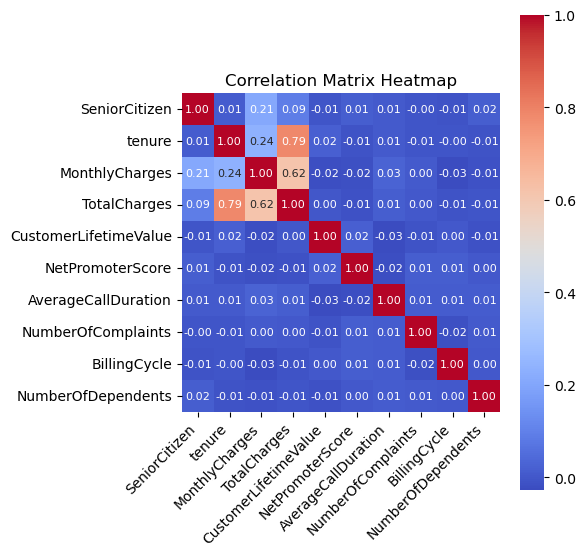

In [78]:
corr_matrix = df.select_dtypes(include=['number']).fillna(0).corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", annot_kws={"size": 8})  
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)
plt.title('Correlation Matrix Heatmap', fontsize=12)
plt.tight_layout()  
plt.show()


In [79]:
# Drop unnecessary columns
columns_to_drop = ['customerID', 'NetPromoterScore', 'CustomerLifetimeValue', 
                   'NumberOfDependents', 'LastInteractionDate', 'BillingCycle']  

df = df.drop(columns=columns_to_drop, errors='ignore')  
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6479 entries, 0 to 6872
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  6479 non-null   object 
 1   SeniorCitizen           6479 non-null   float64
 2   Partner                 6479 non-null   object 
 3   Dependents              6479 non-null   object 
 4   tenure                  6479 non-null   float64
 5   PhoneService            6479 non-null   object 
 6   MultipleLines           6479 non-null   object 
 7   InternetService         6479 non-null   object 
 8   OnlineSecurity          6479 non-null   object 
 9   OnlineBackup            6479 non-null   object 
 10  DeviceProtection        6479 non-null   object 
 11  TechSupport             6479 non-null   object 
 12  StreamingTV             6479 non-null   object 
 13  StreamingMovies         6479 non-null   object 
 14  Contract                6479 non-null   objec

In [80]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print()

missing_values = df.isnull().sum()
data_types = df.dtypes


Unique values in 'gender': ['Female' 'Male']

Unique values in 'SeniorCitizen': [0.         0.16082594 1.        ]

Unique values in 'Partner': ['Yes' 'No']

Unique values in 'Dependents': ['No' 'Yes']

Unique values in 'tenure': [ 1. 34. 29. 45.  2.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 52. 71. 21.
 12. 30. 47. 17. 27. 46. 11. 70. 63. 69. 15. 18. 66. 72. 60.  9.  3. 50.
 64. 56.  7. 42. 35. 48. 65. 38. 68.  5. 32. 43. 55. 37. 36. 41.  6.  4.
 33. 67. 61. 14. 20. 53. 40. 59. 24. 19. 23. 31. 54. 57. 51. 44. 26.  0.
 39.]

Unique values in 'PhoneService': ['No' 'Yes']

Unique values in 'MultipleLines': ['No phone service' 'No' 'Yes']

Unique values in 'InternetService': ['DSL' 'Fiber optic' 'OutlierService' 'No']

Unique values in 'OnlineSecurity': ['No' 'Yes' 'No internet service']

Unique values in 'OnlineBackup': ['Yes' 'No' 'No internet service']

Unique values in 'DeviceProtection': ['No' 'Yes' 'No internet service']

Unique values in 'TechSupport': ['No' 'Yes' 'No internet servic

In [81]:
print('-'*50)
print("Missing values:")
print(missing_values)
print()

--------------------------------------------------
Missing values:
gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
tenure                      0
PhoneService                0
MultipleLines               0
InternetService             0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSupport                 0
StreamingTV                 0
StreamingMovies             0
Contract                    0
PaperlessBilling            0
PaymentMethod               0
MonthlyCharges              0
TotalCharges                0
Churn                       0
AverageCallDuration        82
NumberOfComplaints        103
PreferredContactMethod    103
dtype: int64



In [82]:
df['AverageCallDuration']= df['AverageCallDuration'].fillna(df['AverageCallDuration'].median())
df['NumberOfComplaints']=df['NumberOfComplaints'].fillna(df['NumberOfComplaints'].median())


In [83]:
df['PreferredContactMethod'] = df['PreferredContactMethod'].fillna(df['PreferredContactMethod'].mode()[0])

In [84]:
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                    0
PhoneService              0
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges            0
TotalCharges              0
Churn                     0
AverageCallDuration       0
NumberOfComplaints        0
PreferredContactMethod    0
dtype: int64


In [85]:
y = df.shape
print('-'*50)
print("Shape of Dataset:", y)
print()

--------------------------------------------------
Shape of Dataset: (6479, 23)



In [86]:
print('-'*50)
print("\nData types:")
print(data_types)
print()

--------------------------------------------------

Data types:
gender                     object
SeniorCitizen             float64
Partner                    object
Dependents                 object
tenure                    float64
PhoneService               object
MultipleLines              object
InternetService            object
OnlineSecurity             object
OnlineBackup               object
DeviceProtection           object
TechSupport                object
StreamingTV                object
StreamingMovies            object
Contract                   object
PaperlessBilling           object
PaymentMethod              object
MonthlyCharges            float64
TotalCharges              float64
Churn                      object
AverageCallDuration       float64
NumberOfComplaints        float64
PreferredContactMethod     object
dtype: object



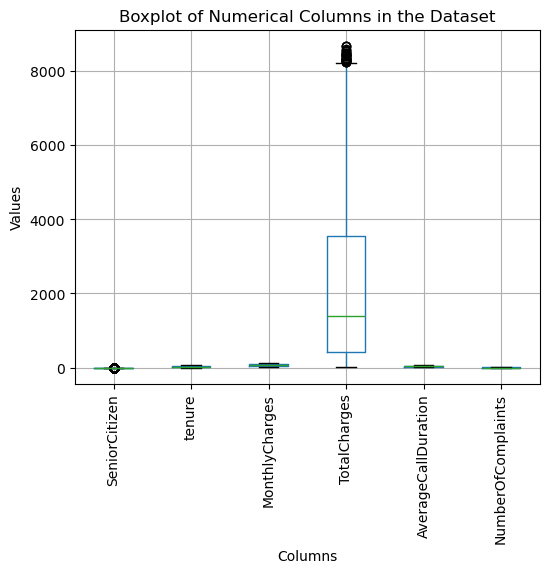

In [104]:
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(10, 6))

# Adjust figure size based on number of columns
if num_columns > 16:
    fig.set_size_inches(6, num_columns * 0.2)  # Reduce height by lowering the scaling factor
else:
    fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Numerical Columns in the Dataset")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [105]:

# Define a function to detect and remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_cleaned

df = remove_outliers(df, 'TotalCharges')

print(f"Shape after removing outliers: {df.shape}")


Shape after removing outliers: (6443, 23)


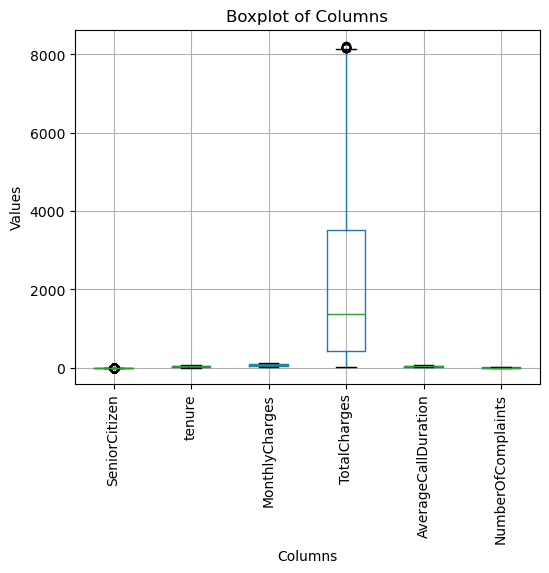

In [108]:
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(10, 6))
if num_columns > 16:
    fig.set_size_inches(6, num_columns * 0.2)
else:
    fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

plt.xticks(rotation=90)

plt.show()

In [109]:
df_cleaned = df.copy()

In [110]:
df_cleaned.head()
# acha data hai but categorical to int convert baki hai

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AverageCallDuration,NumberOfComplaints,PreferredContactMethod
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No,17.526822,2.0,SMS
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,1889.50,No,10.601054,3.0,Phone
2,Male,0.0,No,No,29.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,64.433883,108.15,Yes,45.091316,3.0,SMS
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No,14.931076,4.0,Email
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000,151.65,Yes,8.830655,2.0,SMS


In [111]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'PreferredContactMethod'],
      dtype='object')

In [112]:
# Encode categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'PreferredContactMethod']

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df.head())


   SeniorCitizen  tenure  MonthlyCharges  TotalCharges Churn  \
0            0.0     1.0       29.850000         29.85    No   
1            0.0    34.0       56.950000       1889.50    No   
2            0.0    29.0       64.433883        108.15   Yes   
3            0.0    45.0       42.300000       1840.75    No   
4            0.0     2.0       70.700000        151.65   Yes   

   AverageCallDuration  NumberOfComplaints  gender_Male  Partner_Yes  \
0            17.526822                 2.0        False         True   
1            10.601054                 3.0         True        False   
2            45.091316                 3.0         True        False   
3            14.931076                 4.0         True        False   
4             8.830655                 2.0        False        False   

   Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
0           False             False                            True   
1           False              True     

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6443 entries, 0 to 6872
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          6443 non-null   float64
 1   tenure                                 6443 non-null   float64
 2   MonthlyCharges                         6443 non-null   float64
 3   TotalCharges                           6443 non-null   float64
 4   Churn                                  6443 non-null   object 
 5   AverageCallDuration                    6443 non-null   float64
 6   NumberOfComplaints                     6443 non-null   float64
 7   gender_Male                            6443 non-null   bool   
 8   Partner_Yes                            6443 non-null   bool   
 9   Dependents_Yes                         6443 non-null   bool   
 10  PhoneService_Yes                       6443 non-null   bool   
 11  MultipleL

In [113]:
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6443 entries, 0 to 6872
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          6443 non-null   float64
 1   tenure                                 6443 non-null   float64
 2   MonthlyCharges                         6443 non-null   float64
 3   TotalCharges                           6443 non-null   float64
 4   Churn                                  6443 non-null   int64  
 5   AverageCallDuration                    6443 non-null   float64
 6   NumberOfComplaints                     6443 non-null   float64
 7   gender_Male                            6443 non-null   bool   
 8   Partner_Yes                            6443 non-null   bool   
 9   Dependents_Yes                         6443 non-null   bool   
 10  PhoneService_Yes                       6443 non-null   bool   
 11  MultipleL

In [114]:
df.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,AverageCallDuration,NumberOfComplaints,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,InternetService_OutlierService,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PreferredContactMethod_Phone,PreferredContactMethod_SMS
0,0.0,1.0,29.850000,29.85,0,17.526822,2.0,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True
1,0.0,34.0,56.950000,1889.50,0,10.601054,3.0,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False
2,0.0,29.0,64.433883,108.15,1,45.091316,3.0,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
3,0.0,45.0,42.300000,1840.75,0,14.931076,4.0,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False
4,0.0,2.0,70.700000,151.65,1,8.830655,2.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True


In [115]:
df.to_excel('cleaned_data.xlsx', index=False)

In [116]:
import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Use the number of rows in your dataset
num_data_points = df.shape[0]  # 6443 rows
bins = sturges_rule(num_data_points)

print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 13


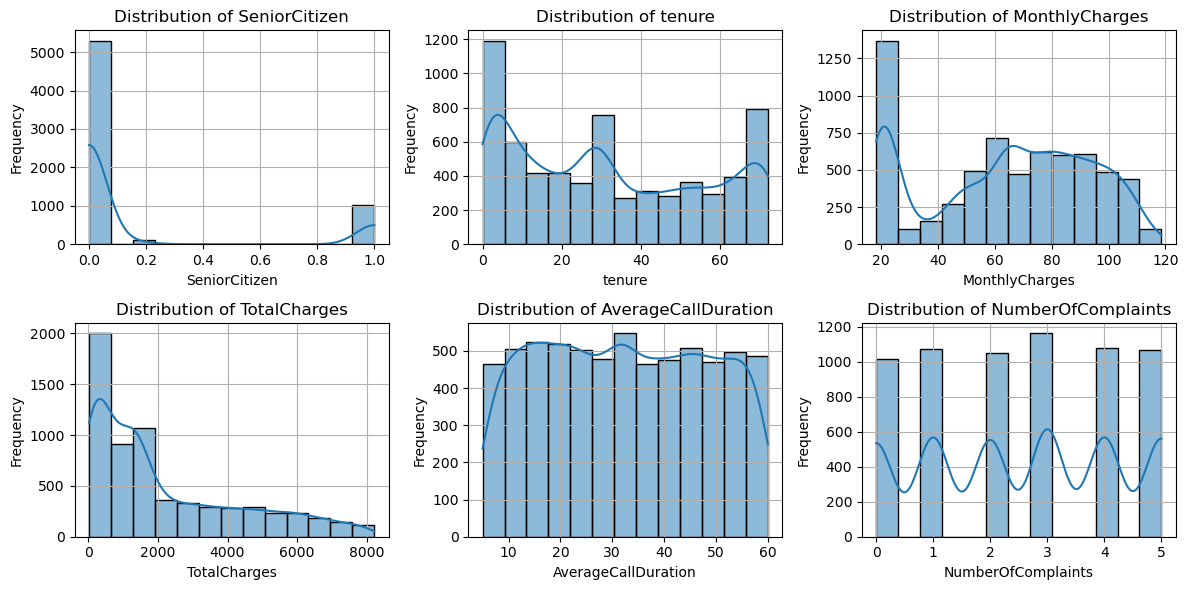

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify continuous variables (excluding binary ones)
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables (only two unique values)
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Set number of bins according to Sturges' Rule
num_bins = 13  # As per your previous calculation

# Set up a figure with subplots for better layout
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(continuous_vars) // n_cols) + (1 if len(continuous_vars) % n_cols != 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
axes = axes.flatten()  # Flatten the 2D axes array to easily iterate over it

# Plot the distribution of each continuous variable
for i, var in enumerate(continuous_vars):
    sns.histplot(data=df, x=var, bins=num_bins, kde=True, ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {var}')
    axes[i].grid(True)

# Turn off unused subplots if there are any
for i in range(len(continuous_vars), len(axes)):
    axes[i].axis('off')

plt.tight_layout()  # Adjust spacing to avoid overlapping
plt.show()

In [120]:
df[continuous_vars].skew()

SeniorCitizen          1.857780
tenure                 0.287482
MonthlyCharges        -0.229464
TotalCharges           1.039777
AverageCallDuration    0.030607
NumberOfComplaints    -0.025137
dtype: float64

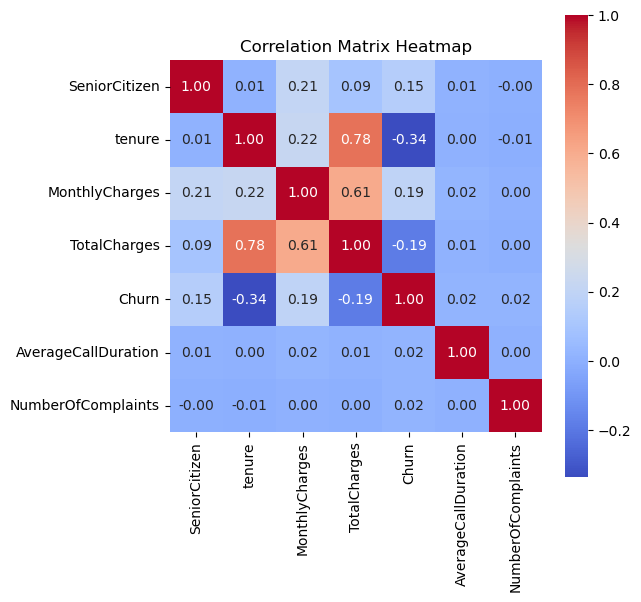

In [121]:

# Compute correlation only for numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Exclude categorical variables
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(6,6))  # Set figure size
sns.heatmap(corr_matrix, annot=len(corr_matrix.columns) <= 15, cmap='coolwarm', square=True, fmt=".2f")  # Avoid clutter
plt.title('Correlation Matrix Heatmap')
plt.show()


In [122]:
Traindf = pd.read_excel('cleaned_data.xlsx')
x = Traindf.drop("Churn",axis=1)
y = Traindf['Churn']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [123]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((4510, 35), (4510,), (1933, 35), (1933,))

In [124]:
# Identify numeric columns
numeric_columns = Traindf.select_dtypes(include=['float64', 'int64']).columns

# Initialize list for columns needing scaling
columns_needs_to_be_scaled = []

# Check for values outside the [0,1] range
for column in numeric_columns:
    if (Traindf[column].max() > 1) or (Traindf[column].min() < 0):  # Check max and min values
        columns_needs_to_be_scaled.append(column)

# Display results
print("Columns with values greater than 1 or less than 0:")
print(columns_needs_to_be_scaled)

Columns with values greater than 1 or less than 0:
['tenure', 'MonthlyCharges', 'TotalCharges', 'AverageCallDuration', 'NumberOfComplaints']


In [125]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AverageCallDuration', 'NumberOfComplaints']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform on training data
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Transform test data using the same scaler
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [126]:
class_counts = df['Churn'].value_counts()
class_counts

Churn
0    4736
1    1707
Name: count, dtype: int64

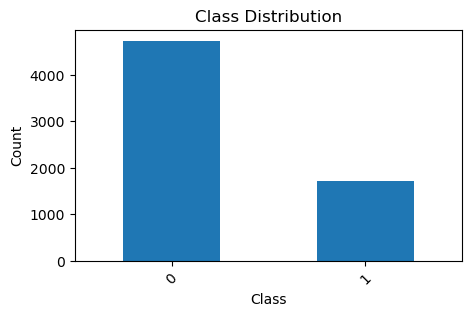

In [129]:
plt.figure(figsize=(5,3)) 
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

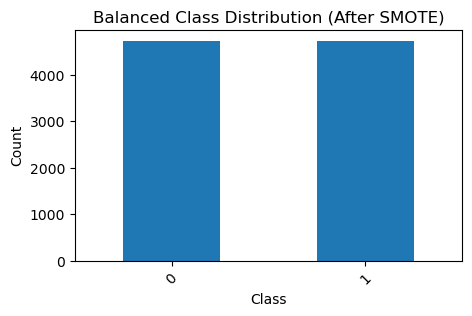

In [130]:
from imblearn.over_sampling import SMOTE

# Define features (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify new class distribution
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(5,3)) 
pd.Series(y_resampled).value_counts().plot(kind='bar')
plt.title('Balanced Class Distribution (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [131]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,tenure,0.135774
1,TotalCharges,0.133263
2,MonthlyCharges,0.115610
3,AverageCallDuration,0.104722
4,NumberOfComplaints,0.055185
5,Contract_Two year,0.042045
6,PaymentMethod_Electronic check,0.031398
7,InternetService_Fiber optic,0.029456
8,PaperlessBilling_Yes,0.021752
9,TechSupport_Yes,0.021463


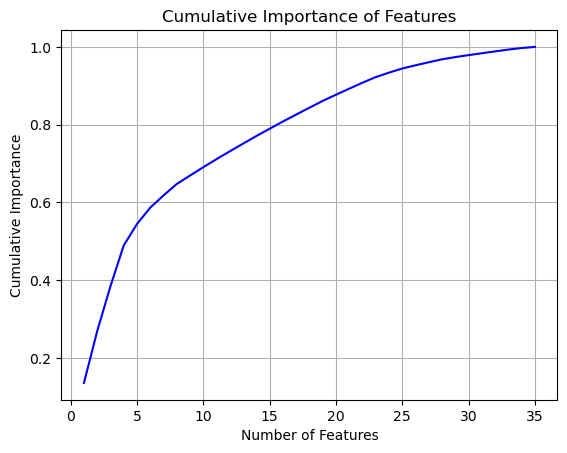

In [132]:
#check optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_clean = X_train.copy()

X_train_clean = pd.get_dummies(X_train_clean, drop_first=True)

X_train_clean = X_train_clean.astype(float)

# Replace infinite values with NaN, then drop NaNs
X_train_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_clean.dropna(inplace=True)

# Compute VIF
vif = pd.DataFrame()
vif["Variable"] = X_train_clean.columns
vif["VIF"] = [variance_inflation_factor(X_train_clean.values, i) for i in range(X_train_clean.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

print(vif)

                                 Variable        VIF
15     OnlineSecurity_No internet service  73.022396
17       OnlineBackup_No internet service  66.720883
23        StreamingTV_No internet service  66.036647
21        TechSupport_No internet service  55.138711
25    StreamingMovies_No internet service  51.799540
19   DeviceProtection_No internet service  50.017928
2                          MonthlyCharges  37.749931
9                        PhoneService_Yes  30.931609
1                                  tenure  12.782849
3                            TotalCharges  11.849567
13                     InternetService_No   7.694454
12            InternetService_Fiber optic   5.925593
4                     AverageCallDuration   3.982009
5                      NumberOfComplaints   3.282539
28                      Contract_Two year   3.137842
26                    StreamingMovies_Yes   3.048072
29                   PaperlessBilling_Yes   3.018457
24                        StreamingTV_Yes   3.

In [137]:
import time

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [160]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42, algorithm='SAMME'),  # Fixed deprecation warning
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

LogisticRegression(n_jobs=-1, random_state=42, max_iter=500)

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)  # Fixed precision issue
    recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=1)  # Fixed recall issue
    f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=1)  # Fixed f1-score issue

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.794678,0.784002,0.794678,0.786174,1.159487
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.050424
2,KNeighborsClassifier,0.819512,0.810844,0.819512,0.809591,0.245833
3,GaussianNB,0.669845,0.794177,0.669845,0.688256,0.012604
4,AdaBoostClassifier,0.793126,0.781364,0.793126,0.783065,0.240675
5,GradientBoostingClassifier,0.822395,0.814261,0.822395,0.814110,1.023561
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.174451
7,XGBClassifier,0.981596,0.981553,0.981596,0.981530,0.109809
8,SVC,0.732373,0.803997,0.732373,0.619231,1.754394


In [164]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    # Check the unique classes in y_test and y_test_pred

    # Calculate metrics with zero_division=1 to avoid errors for missing classes
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=1)

    # Append results to dictionary
    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
print(df_test)

                    Algorithm  Accuracy  Precision    Recall  F1-score
0          LogisticRegression  0.810140   0.799653  0.810140  0.800917
1      DecisionTreeClassifier  0.736161   0.741770  0.736161  0.738762
2        KNeighborsClassifier  0.764615   0.748198  0.764615  0.752720
3                  GaussianNB  0.655975   0.799397  0.655975  0.676301
4          AdaBoostClassifier  0.803932   0.793027  0.803932  0.794975
5  GradientBoostingClassifier  0.809105   0.799686  0.809105  0.801804
6      RandomForestClassifier  0.806518   0.795850  0.806518  0.797587
7               XGBClassifier  0.781686   0.772132  0.781686  0.775528
8                         SVC  0.741335   0.808242  0.741335  0.631214


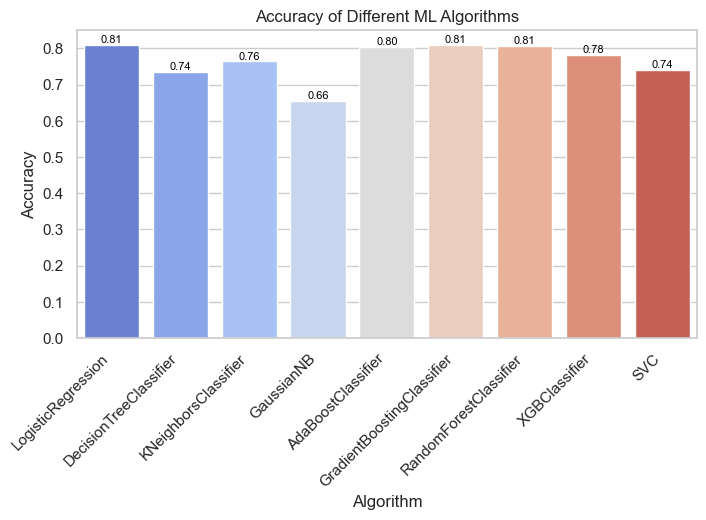

In [165]:
results_df = pd.DataFrame(results_test)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create a bar plot with 'Algorithm' assigned to 'hue'
plt.figure(figsize=(8, 4))
ax = sns.barplot(x="Algorithm", y="Accuracy", data=results_df, hue="Algorithm", palette="coolwarm")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and title
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different ML Algorithms")

# Show the exact accuracy values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8, color='black')

# Show the plot
plt.show()

In [166]:
from sklearn.model_selection import train_test_split

# Define feature columns (excluding the target variable 'Churn')
feature_columns = [col for col in df.columns if col != 'Churn']

# Define the target variable
target_column = 'Churn'

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_columns], df[target_column], test_size=0.30, random_state=42
)

# Demographic features
X_train_demographics = X_train[['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes']]
X_test_demographics = X_test[['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes']]

# Service Usage features
X_train_usage = X_train[['tenure', 'AverageCallDuration', 'NumberOfComplaints', 
                         'PhoneService_Yes', 'MultipleLines_Yes', 
                         'InternetService_Fiber optic', 'InternetService_No', 
                         'InternetService_OutlierService']]
X_test_usage = X_test[['tenure', 'AverageCallDuration', 'NumberOfComplaints', 
                       'PhoneService_Yes', 'MultipleLines_Yes', 
                       'InternetService_Fiber optic', 'InternetService_No', 
                       'InternetService_OutlierService']]

# Billing features
X_train_billing = X_train[['MonthlyCharges', 'TotalCharges', 'PaperlessBilling_Yes', 
                           'PaymentMethod_Credit card (automatic)', 
                           'PaymentMethod_Electronic check', 
                           'PaymentMethod_Mailed check']]
X_test_billing = X_test[['MonthlyCharges', 'TotalCharges', 'PaperlessBilling_Yes', 
                         'PaymentMethod_Credit card (automatic)', 
                         'PaymentMethod_Electronic check', 
                         'PaymentMethod_Mailed check']]

# Print column names for verification
print('X_train_demographics columns:', X_train_demographics.columns)
print('-' * 120)
print('X_train_usage columns:', X_train_usage.columns)
print('-' * 120)
print('X_train_billing columns:', X_train_billing.columns)

X_train_demographics columns: Index(['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes'], dtype='object')
------------------------------------------------------------------------------------------------------------------------
X_train_usage columns: Index(['tenure', 'AverageCallDuration', 'NumberOfComplaints',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'InternetService_OutlierService'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------
X_train_billing columns: Index(['MonthlyCharges', 'TotalCharges', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [167]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42, algorithm='SAMME'),  # Fixed deprecation warning
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)  # Fixed precision issue
    recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=1)  # Fixed recall issue
    f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=1)  # Fixed f1-score issue

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.794678,0.784002,0.794678,0.786174,1.282842
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.050030
2,KNeighborsClassifier,0.819512,0.810844,0.819512,0.809591,0.241938
3,GaussianNB,0.669845,0.794177,0.669845,0.688256,0.012376
4,AdaBoostClassifier,0.793126,0.781364,0.793126,0.783065,0.249749
5,GradientBoostingClassifier,0.822395,0.814261,0.822395,0.814110,1.019754
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.181977
7,XGBClassifier,0.981596,0.981553,0.981596,0.981530,0.104225
8,SVC,0.732373,0.803997,0.732373,0.619231,2.022998


In [169]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import time

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of algorithms to apply
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42, max_iter=200, solver='saga'),  # Increased max_iter and changed solver
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42, algorithm='SAMME'),  # Fixed deprecation warning
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train_scaled, y_train)  # Use scaled training data
    y_train_pred = algorithm.predict(X_train_scaled)  # Predict using scaled training data

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
    recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=1)

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

# Apply the algorithms and calculate performance metrics for test data
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test_scaled)  # Use scaled test data

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=1)

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.812726,0.803356,0.812726,0.805137
1,DecisionTreeClassifier,0.736679,0.742457,0.736679,0.739351
2,KNeighborsClassifier,0.753751,0.751534,0.753751,0.752601
3,GaussianNB,0.658562,0.797957,0.658562,0.678933
4,AdaBoostClassifier,0.803932,0.793027,0.803932,0.794975
5,GradientBoostingClassifier,0.809105,0.799686,0.809105,0.801804
6,RandomForestClassifier,0.806001,0.795221,0.806001,0.796953
7,XGBClassifier,0.781686,0.772132,0.781686,0.775528
8,SVC,0.807036,0.795376,0.807036,0.795723


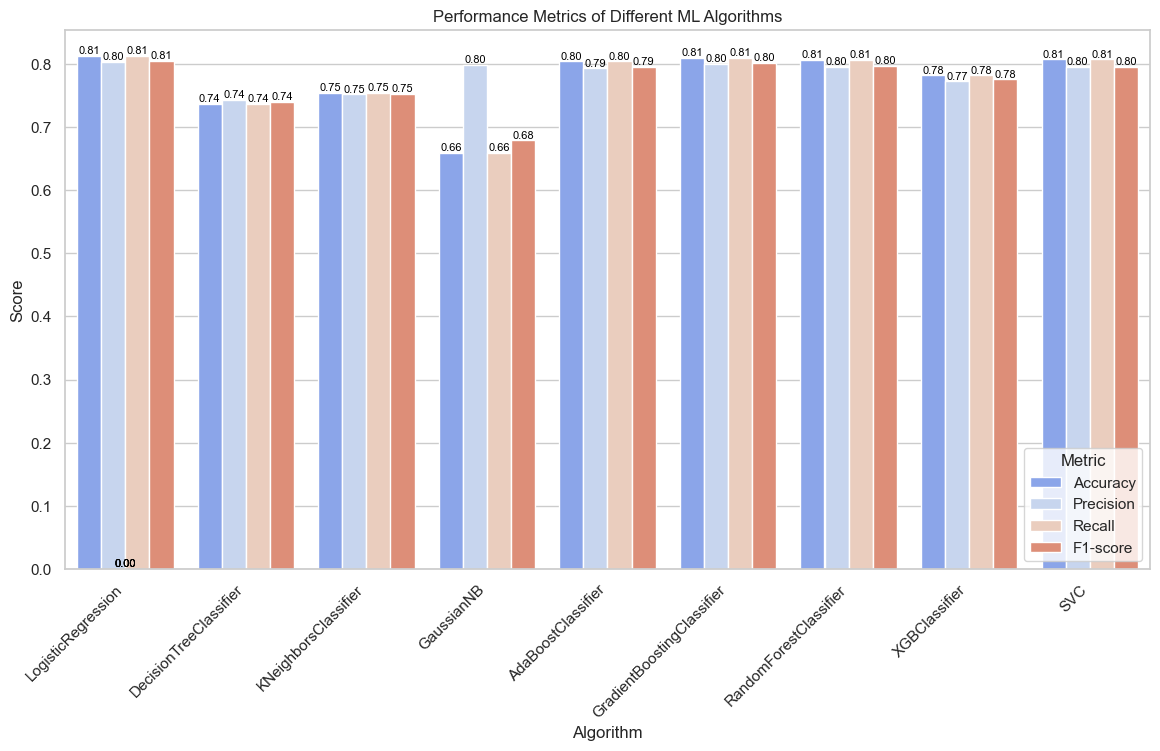

In [174]:
# Convert results to a long format suitable for hue use
results_melted = results_df.melt(id_vars=["Algorithm"], 
                                  value_vars=["Accuracy", "Precision", "Recall", "F1-score"],
                                  var_name="Metric", value_name="Score")

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create a bar plot with 'Metric' as hue
plt.figure(figsize=(14,7))
ax = sns.barplot(x="Algorithm", y="Score", hue="Metric", data=results_melted, palette="coolwarm")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and title
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Performance Metrics of Different ML Algorithms")

# Show the exact score values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8, color='black')

# Show the plot
plt.show()

Conclusion Based on Comparative Analysis

From the visual analysis and data comparison:


    1.  Logistic Regression showed a slight improvement after tuning, achieving the highest accuracy (0.8148). It is a strong candidate for the dataset.

    2.  Support Vector Classifier (SVC) significantly improved after tuning, reaching 0.8127 accuracy, making it a strong model for consideration.

    3.  Gradient Boosting Classifier and AdaBoost Classifier remained consistent in performance, with Gradient Boosting performing slightly better (0.8086 accuracy).

    4.  Decision Tree Classifier and K-Nearest Neighbors (KNN) did not show significant improvements and had lower accuracy scores, making them less ideal choices.

    5.  Naïve Bayes (GaussianNB) had the lowest accuracy (~0.6580) and would not be a reliable model for this dataset.

    6.  Random Forest and XGBoost remained steady in their performance but did not surpass Logistic Regression or SVC.


Final Recommendation


    •   Logistic Regression or SVC are the best choices based on accuracy and balanced performance.
    •   Gradient Boosting and AdaBoost are also strong contenders if an ensemble model is preferred.
    •   Decision Tree, KNN, and GaussianNB should be avoided due to lower accuracy and recall.


If the dataset requires interpretability, Logistic Regression is preferred. If higher complexity is acceptable, SVC or Gradient Boosting would be ideal.
